In [117]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [118]:
pd.set_option('display.max_columns', 5400)
# "The maximum width in characters of a column"
pd.set_option('display.max_colwidth', 500)

In [3]:
df = pd.read_csv('access_log_Aug95', sep='delimiter', header=None, engine='python')

In [4]:
df.head(5)

,0
0,"in24.inetnebr.com - - [01/Aug/1995:00:00:01 -0400] ""GET /shuttle/missions/sts-68/news/sts-68-mcc-05.txt HTTP/1.0"" 200 1839"
1,"uplherc.upl.com - - [01/Aug/1995:00:00:07 -0400] ""GET / HTTP/1.0"" 304 0"
2,"uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] ""GET /images/ksclogo-medium.gif HTTP/1.0"" 304 0"
3,"uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] ""GET /images/MOSAIC-logosmall.gif HTTP/1.0"" 304 0"
4,"uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] ""GET /images/USA-logosmall.gif HTTP/1.0"" 304 0"


In [5]:
date_regex = r'\[(.+)\]'
date_df = [re.search(date_regex,record).group(1)
          if re.search(date_regex, record)
          else 'no match found'
          for record in df[0]]
df['date'] = date_df

In [6]:
status_regex = r'\s(\d{3})\s'
status_df = [re.search(status_regex,record).group(1)
          if re.search(status_regex, record)
          else 'no match found'
          for record in df[0]]
df['status'] = status_df

In [7]:
bytes_regex = r'\d{3}\s(\d+)$'
bytes_df = [re.search(bytes_regex,record).group(1)
          if re.search(bytes_regex, record)
          else 'no match found'
          for record in df[0]]
df['bytes'] = bytes_df

In [8]:
resource_regex = r'"(\w+)\s(.+?)(?=(\sHTTP\/1.0")|")'
resource_df = [re.search(resource_regex,record).group(2)
          if re.search(resource_regex, record)
          else 'no match found'
          for record in df[0]]
df['resource'] = resource_df

In [9]:
del df[0]

In [10]:
df.head(15)

,date,status,bytes,resource
0,01/Aug/1995:00:00:01 -0400,200,1839,/shuttle/missions/sts-68/news/sts-68-mcc-05.txt
1,01/Aug/1995:00:00:07 -0400,304,0,/
2,01/Aug/1995:00:00:08 -0400,304,0,/images/ksclogo-medium.gif
3,01/Aug/1995:00:00:08 -0400,304,0,/images/MOSAIC-logosmall.gif
4,01/Aug/1995:00:00:08 -0400,304,0,/images/USA-logosmall.gif
5,01/Aug/1995:00:00:09 -0400,200,1713,/images/launch-logo.gif
6,01/Aug/1995:00:00:10 -0400,304,0,/images/WORLD-logosmall.gif
7,01/Aug/1995:00:00:10 -0400,200,1687,/history/skylab/skylab.html
8,01/Aug/1995:00:00:10 -0400,200,11853,/images/launchmedium.gif
9,01/Aug/1995:00:00:11 -0400,200,9202,/history/skylab/skylab-small.gif


In [11]:
print(df.loc[df['bytes'] == 'no match found']) 

                               date status           bytes  \
158      01/Aug/1995:00:03:53 -0400    302  no match found   
321      01/Aug/1995:00:07:33 -0400    404  no match found   
779      01/Aug/1995:00:28:41 -0400    404  no match found   
1066     01/Aug/1995:00:38:01 -0400    403  no match found   
1426     01/Aug/1995:00:50:12 -0400    404  no match found   
1730     01/Aug/1995:01:04:54 -0400    404  no match found   
1735     01/Aug/1995:01:05:14 -0400    404  no match found   
2021     01/Aug/1995:01:17:38 -0400    404  no match found   
2072     01/Aug/1995:01:22:07 -0400    302  no match found   
2303     01/Aug/1995:01:31:56 -0400    302  no match found   
2352     01/Aug/1995:01:33:02 -0400    404  no match found   
2451     01/Aug/1995:01:35:50 -0400    404  no match found   
2474     01/Aug/1995:01:36:23 -0400    404  no match found   
2477     01/Aug/1995:01:36:30 -0400    404  no match found   
2483     01/Aug/1995:01:36:38 -0400    404  no match found   
2486    

In [129]:
df_new = df.loc[df['resource'] != 'no match found']

In [132]:
df_new = df_new.loc[df['bytes'] != 'no match found']

In [130]:
len(df)

1569898

In [131]:
len(df_new)

1569888

In [134]:
import datetime
df_new['date'] = pd.to_datetime(df_new.date,format='%d/%b/%Y:%H:%M:%S -0400')
type(df_new['date'])

pandas.core.series.Series

In [26]:
df_new.head(5)

,date,status,bytes,resource
0,1995-08-01 00:00:01,200,1839,/shuttle/missions/sts-68/news/sts-68-mcc-05.txt
1,1995-08-01 00:00:07,304,0,/
2,1995-08-01 00:00:08,304,0,/images/ksclogo-medium.gif
3,1995-08-01 00:00:08,304,0,/images/MOSAIC-logosmall.gif
4,1995-08-01 00:00:08,304,0,/images/USA-logosmall.gif


In [28]:
temp_df = df_new

In [133]:
df_new['bytes'] = pd.to_numeric(df_new['bytes'])

In [35]:
print(df_new.loc[df_new['bytes'].idxmax()])

date                                    1995-08-03 15:51:23
status                                                  200
bytes                                               3421948
resource    /statistics/1995/Jul/Jul95_reverse_domains.html
Name: 53631, dtype: object


In [36]:
print(df_new.loc[df_new['bytes'].idxmin()])

date        1995-08-01 00:00:07
status                      304
bytes                         0
resource                      /
Name: 1, dtype: object


In [37]:
print(df_new['bytes'].mean())

17244.9678759674


In [38]:
print(df_new['bytes'].std())

68244.0386593754


In [39]:
df_new['status'].value_counts()

200    1398910
304     134146
302      22661
500          3
Name: status, dtype: int64

In [40]:
status_df = df_new['status'].value_counts()

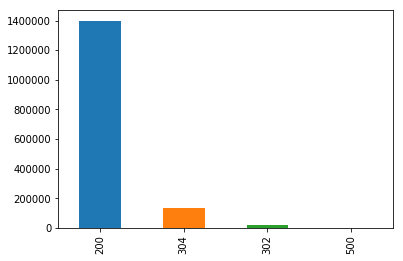

In [43]:
status_df.plot(kind='bar')

(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([3.0000000e+00, 1.3989370e+05, 2.7978440e+05, 4.1967510e+05,
        5.5956580e+05, 6.9945650e+05, 8.3934720e+05, 9.7923790e+05,
        1.1191286e+06, 1.2590193e+06, 1.3989100e+06]),
 <a list of 10 Patch objects>)

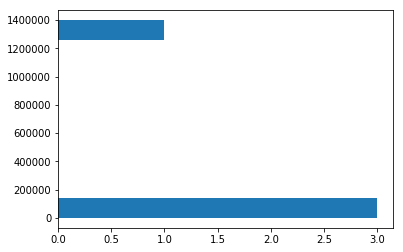

In [114]:
plt.hist(status_df, normed=False, bins=10,orientation="horizontal")

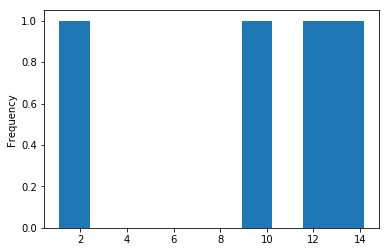

In [113]:
log_status= np.log(status_df)
log_status.plot(kind='hist',bins=10)

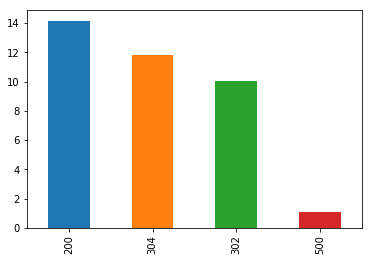

In [116]:
log_status= np.log(status_df)
log_status.plot(kind='bar')

In [120]:
resource_df = df_new['resource'].value_counts()

In [126]:
resource_df = resource_df.head(20)
print(resource_df)

/images/NASA-logosmall.gif                         97379
/images/KSC-logosmall.gif                          75326
/images/MOSAIC-logosmall.gif                       67437
/images/USA-logosmall.gif                          67057
/images/WORLD-logosmall.gif                        66433
/images/ksclogo-medium.gif                         62767
/ksc.html                                          43662
/history/apollo/images/apollo-logo1.gif            37820
/images/launch-logo.gif                            35131
/                                                  30305
/images/ksclogosmall.gif                           27808
/shuttle/missions/sts-69/mission-sts-69.html       24589
/shuttle/countdown/                                24450
/shuttle/missions/sts-69/count69.gif               24377
/shuttle/missions/sts-69/sts-69-patch-small.gif    23400
/shuttle/missions/missions.html                    22440
/images/launchmedium.gif                           19867
/htbin/cdt_main.pl             

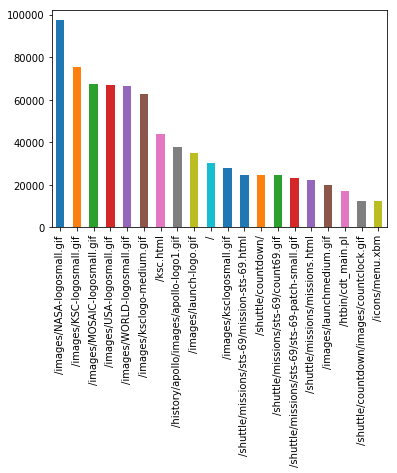

In [77]:
resource_df.plot(kind='bar')

In [154]:
df_new['status'] = pd.to_numeric(df_new['status'])

In [48]:
error_df = df_new.loc[df_new['status'] !=200]

In [49]:
error_resource_df = error_df['resource'].value_counts()

In [127]:
print(error_resource_df.head(20))

/images/NASA-logosmall.gif                         19072
/images/KSC-logosmall.gif                          11328
/images/MOSAIC-logosmall.gif                        8617
/images/USA-logosmall.gif                           8565
/images/WORLD-logosmall.gif                         8360
/images/ksclogo-medium.gif                          7722
/history/apollo/images/apollo-logo1.gif             4355
/shuttle/countdown/images/countclock.gif            4227
/images/launch-logo.gif                             4178
/                                                   3605
/images/ksclogosmall.gif                            2578
/shuttle/missions/sts-69/count69.gif                2442
/ksc.html                                           2280
/shuttle/countdown/                                 2214
/shuttle/missions/sts-69/sts-69-patch-small.gif     2180
/shuttle/missions/missions.html                     1736
/images/launchmedium.gif                            1532
/icons/blank.xbm               

In [51]:
error_resource_df = error_resource_df.head(20)

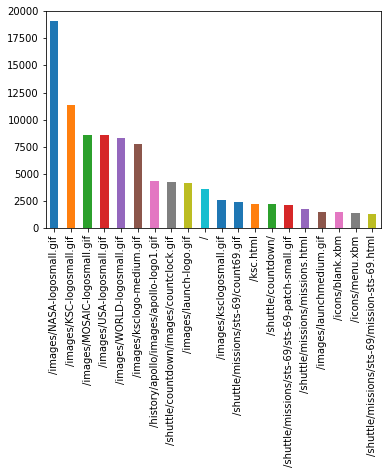

In [52]:
error_resource_df.plot(kind='bar')

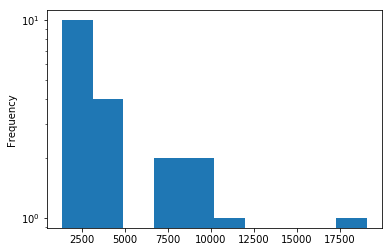

In [140]:
error_resource_df.plot(kind='hist',log='true')

In [155]:
fulfilled_df = df_new.loc[df_new['status'] ==200]

In [156]:
fulfilled_df['day'] = fulfilled_df.date.dt.strftime('%d')

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [157]:
fulfilled_df.head(5)

,date,status,bytes,resource,day
0,1995-08-01 00:00:01,200,1839,/shuttle/missions/sts-68/news/sts-68-mcc-05.txt,01
5,1995-08-01 00:00:09,200,1713,/images/launch-logo.gif,01
7,1995-08-01 00:00:10,200,1687,/history/skylab/skylab.html,01
8,1995-08-01 00:00:10,200,11853,/images/launchmedium.gif,01
9,1995-08-01 00:00:11,200,9202,/history/skylab/skylab-small.gif,01


In [149]:
day_fulfilled_df = fulfilled_df['day'].value_counts()

In [158]:
day_fulfilled_df = day_fulfilled_df.sort_values( ascending=[True])

In [151]:
print(day_fulfilled_df)

Series([], Name: day, dtype: int64)


In [152]:
day_fulfilled_df.plot(kind='bar')

TypeError: Empty 'DataFrame': no numeric data to plot

In [60]:
fulfilled_df['hour'] = fulfilled_df.date.dt.strftime('%H')

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
hour_fulfilled_df = fulfilled_df['hour'].value_counts()

In [62]:
print(hour_fulfilled_df)

15    98029
12    94238
13    93408
14    90233
16    89684
11    85410
10    78451
17    72581
09    69849
18    59825
08    57786
22    53075
20    52852
19    52736
21    50948
23    48431
00    42652
07    42227
01    34260
02    28637
06    28217
03    26566
05    25035
04    23780
Name: hour, dtype: int64


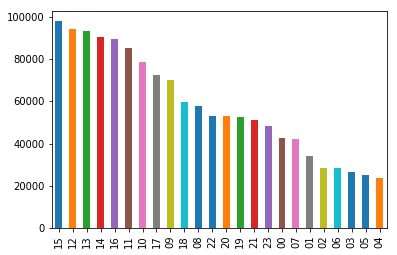

In [63]:
hour_fulfilled_df.plot(kind='bar')